# Udacity Data Scientist Nanodegree - Project 1 (Data Science Blog Post)

### Analyzing Stack Overflow Survey Data

Stack Overflow Survey Data 2019 has been taken for our analysis. Preliminary analysis and visualisation have been used to answer a few question regarding the data. Only developers' data have taken for our analysis.


#### Questions

    1). Which country has the highest job satisfaction for developers ?
    2). Is there the difference in job satisfaction between developers whose undergraduate major is IT-related an those who are not ?
    3). Do developers who contribute to open source have higher salary than those who are not?

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython import display
import seaborn as sns
%matplotlib inline

df = pd.read_csv("survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [15]:
# Filter the data so it only contains the survey result by the developer
developer_data = df[df['MainBranch'] == 'I am a developer by profession']

# Fill the N/A values in JobSat column with the mode
developer_data['JobSat'] = developer_data['JobSat'].fillna(developer_data['JobSat'].mode()[0])

# Fill the N/A values in ConvertedComp column with the mean of each country
salary_per_country = developer_data.groupby('Country')['ConvertedComp'].mean()
developer_data['ConvertedComp'] = developer_data.apply(lambda x: salary_per_country[x['Country']] if pd.isnull(x['ConvertedComp']) else x['ConvertedComp'], axis=1)
developer_data = developer_data.dropna(subset=['ConvertedComp'])

<ipython-input-15-077c7cc9f096>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developer_data['JobSat'] = developer_data['JobSat'].fillna(developer_data['JobSat'].mode()[0])
<ipython-input-15-077c7cc9f096>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developer_data['ConvertedComp'] = developer_data.apply(lambda x: salary_per_country[x['Country']] if pd.isnull(x['ConvertedComp']) else x['ConvertedComp'], axis=1)


#### Data Exploration

#### 1. Country with the highest jobs satisfaction

In [16]:
# Set the JobSat and OpenSourcerr column into categorical data type so it will be sorted with the right order (ordinal data)
developer_data['JobSat'] = pd.Categorical(developer_data['JobSat'], categories=['Very dissatisfied',
                                                                                'Slightly dissatisfied',
                                                                                'Neither satisfied nor dissatisfied',
                                                                                'Slightly satisfied',
                                                                                'Very satisfied'], ordered=True)

developer_data['OpenSourcer'] = pd.Categorical(developer_data['OpenSourcer'], categories=['Never',
                                                                                'Less than once per year',
                                                                                'Less than once a month but more than once per year',
                                                                                'Once a month or more often'], ordered=True)

In [18]:
# Filtered the data so it only contains the survey result from the top 30 country based on the total respondents
top_30_country = list(developer_data['Country'].value_counts().head(30).index)
filtered_developer_data = developer_data[developer_data['Country'].isin(top_30_country)]

# Aggregate the data so we can visualize it later
aggregated_data = filtered_developer_data.groupby(['Country','JobSat'], as_index=False)['Respondent'].count()

# Add column percentage
total_respondents_per_country = filtered_developer_data['Country'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1) \
                                           .round(3)

# Pivot the data
aggregated_data = aggregated_data[['Country', 'JobSat', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='JobSat') \
                 .sort_values('Very satisfied', ascending=False)

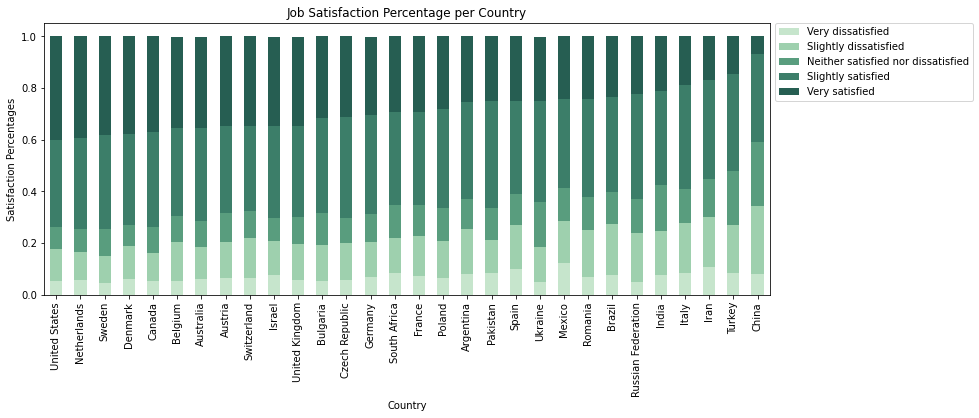

In [21]:
# Visualize the data
pivoted_data.plot(kind='bar', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.3")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('Satisfaction Percentages')
plt.title('Job Satisfaction Percentage per Country')
plt.show()

#### 2. Undergraduate Major with job satisfaction

In [22]:
# Create a new columns to flag each respondent if their major is related or not
def check_major(value):
    '''
    input: the value of each row in the selected column
    output: the mapped value based on the rule we made in this function
    '''

    if value == 'Computer science, computer engineering, or software engineering' \
    or value == 'Information systems, information technology, or system administration' \
    or value == 'Web development or web design':
        return 'IT Related'
    return 'Not IT Related'

developer_data['Major'] = developer_data['UndergradMajor'].apply(check_major)

developer_data['Major'].value_counts(normalize=True)

IT Related        0.708178
Not IT Related    0.291822
Name: Major, dtype: float64

In [23]:
# Aggregate the data so we know how many respondents in each major (IT related or not IT related)
aggregated_data = developer_data.groupby(['Major','JobSat'], as_index=False)['Respondent'].count()

# Add column percentage
total_respondents_per_major = developer_data['Major'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_major[x['Major']], axis=1) \
                                           .round(4)

# Pivot the data
aggregated_data = aggregated_data[['Major', 'JobSat', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Major', columns='JobSat')

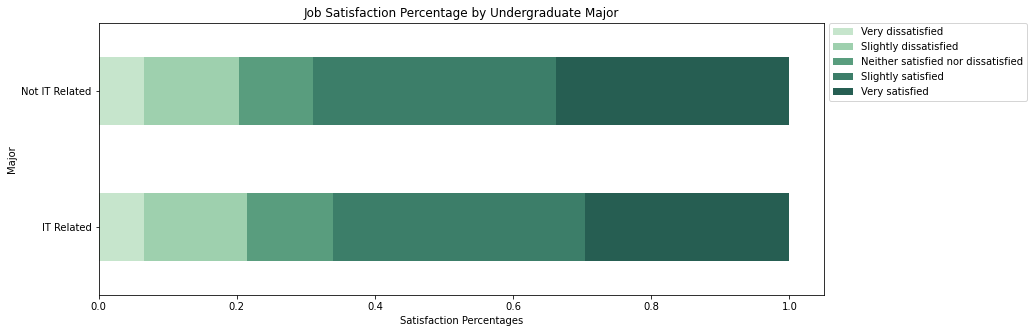

In [24]:
# Visualize the data
pivoted_data.plot(kind='barh', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.3")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.xlabel('Satisfaction Percentages')
plt.title('Job Satisfaction Percentage by Undergraduate Major')
plt.show()

In [25]:
pivoted_data

JobSat,Very dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Very satisfied
Major,,,,,
IT Related,0.0661,0.1493,0.1239,0.3641,0.2966
Not IT Related,0.0664,0.1363,0.1070,0.3527,0.3376


#### 3. Compensation and contributing to open source

In [26]:
# Aggregate the data
comp_per_category = developer_data.groupby('OpenSourcer', as_index=False)['ConvertedComp'].mean()

comp_per_category

,OpenSourcer,ConvertedComp
0,Never,117254.369170
1,Less than once per year,120802.882927
2,Less than once a month but more than once per ...,123194.248789
3,Once a month or more often,123881.913894


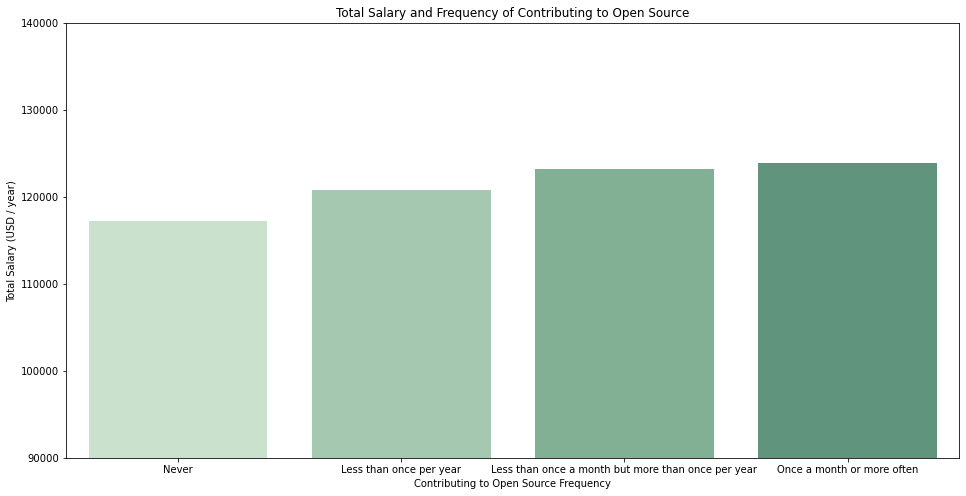

In [27]:
# Visualize the data
plt.figure(figsize=(16, 8))
sns.barplot(data=comp_per_category, x='OpenSourcer', y='ConvertedComp', palette=sns.color_palette("ch:2.5,-.2,dark=.3"))
plt.ylim(90000,140000)
plt.title('Total Salary and Frequency of Contributing to Open Source')
plt.ylabel('Total Salary (USD / year)')
plt.xlabel('Contributing to Open Source Frequency')
plt.show()

We can see from the data that the more frequent the developers contribute to open source, the higher their salary. People who contribute to open source once a month or more have 7% higher salary than those who never contribute.

The correlation between those two variables does not mean if we want the higher salary, we have to start contributing to open source. We need to remember one thing, correlation does not imply causation. One thing that seems reasonable about those correlation are, you need to have some sort of skills if you want to contribute to open source (I did not mean that a newbie in programming could not contribute but we can agree that the more experienced developers must be better at doing that), thus make you a more skilled and better developers, and the more skilled someone, the higher their salary.



### Conclusion
In this notebook we did the analysis about developers from Stack Overflow Survey Data 2019, and these are the summary of what we have done.


1). We measure the job satisfaction level for each country and found that United States has the highest job satisfaction level in the world, and 5 of top 10 countries with the highest job satisfaction level are located in Europe.


2). We then looked at their undergraduate major and found that developers whose undergraduate major is not IT-related have slightly better job satisfaction.


3). Finally, we found that developers who contribute more to the open source have the higher salary.